## Name: David Geng


## Default Data: Classification Analysis

Predicting Default Class


### Loading libraries


In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from plotnine import *

# importing scipy
from scipy.stats import chi2_contingency

### Loading the Dataset


In [2]:
# # loading dataset
# from google.colab import files
# uploaded = files.upload()

In [3]:
# reading the dataset
df = pd.read_csv('default.csv')

### Descriptive Analytics


In [4]:
# first few rows
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
# default distribution
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
# last few rows
df.tail()

,default,student,balance,income
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236
9999,No,Yes,200.922183,16862.95232


In [7]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [8]:
# unique values
df.nunique()

default        2
student        2
balance     9502
income     10000
dtype: int64

In [9]:
# describe for summary stats
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


### Graphical Summary


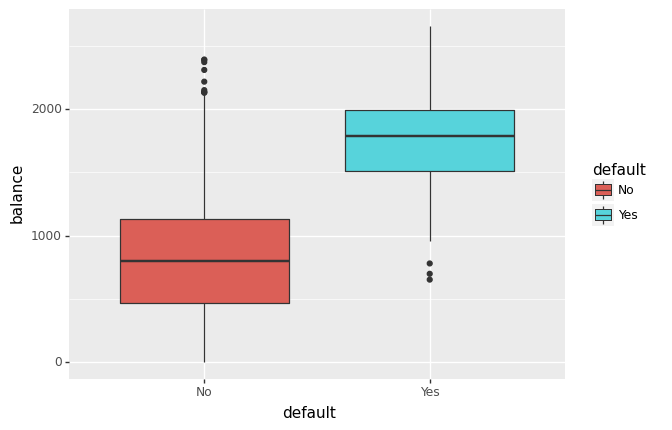

<ggplot: (8783263816939)>

In [10]:
# boxplot balance vs default
ggplot(df, aes(x = 'default', y = 'balance', fill = 'default')) + geom_boxplot()

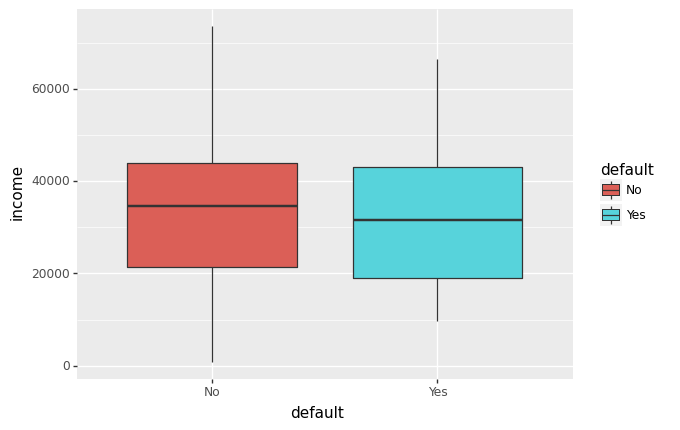

<ggplot: (8783264351485)>

In [11]:
# boxplot income vs default
ggplot(df, aes(x = 'default', y = 'income', fill = 'default')) + geom_boxplot()

In [12]:
# correlation matrix
df.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


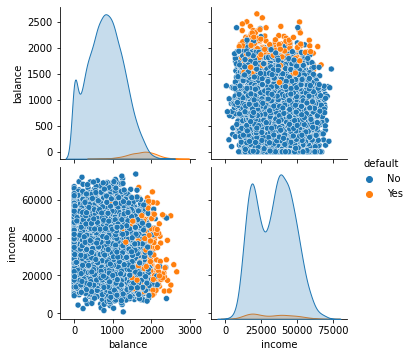

In [13]:
# scatterplot matrix
sns.pairplot(df, diag_kind='kde', hue='default')

In [14]:
# chi square test
for col in ['student']:
    crosstab = pd.crosstab(df[col], df['default'], margins=True)
    stat, p_value, dof, expected = chi2_contingency(crosstab)
    print('P_value of Chi_Square Test between Default and ', col, p_value)

P_value of Chi_Square Test between Default and  student 0.013720363230633343


### Predictive Analytics: Choosing Predictors


In [15]:
# recoding default
df.default = np.where(df.default == 'Yes', 1, 0)

In [16]:
# choose predictors
predictors = ['student', 'balance']

In [17]:
# target variable
target = 'default'

In [18]:
# creating dummy variables
X = pd.get_dummies(df[predictors], drop_first=True)
X.head()

,balance,student_Yes
0,729.526495,0
1,817.180407,1
2,1073.549164,0
3,529.250605,0
4,785.655883,0


In [19]:
# target variable
y = df[target]
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

### Predictive Analytics: Creating Training and Test Datasets


In [20]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y)

In [21]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1548 to 8732
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      8000 non-null   float64
 1   student_Yes  8000 non-null   uint8  
dtypes: float64(1), uint8(1)
memory usage: 132.8 KB


In [22]:
y_train.head()

1548    1
9360    0
1086    0
2151    0
6092    0
Name: default, dtype: int64

In [23]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 3802 to 2194
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      2000 non-null   float64
 1   student_Yes  2000 non-null   uint8  
dtypes: float64(1), uint8(1)
memory usage: 33.2 KB


In [24]:
y_val.head()

3802    0
9617    0
1316    0
9377    0
8489    1
Name: default, dtype: int64

In [25]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

### Logistic Regression Model


In [26]:
# import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [27]:
# linear model
model = LogisticRegression()

In [28]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# prediction
y_pred = model.predict(X_val)

In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,0,1
0,1927,6
1,45,22


In [31]:
# Evaluation scores
print('Accuracy', accuracy_score(y_val, y_pred))
print('Recall', recall_score(y_val, y_pred))
print('Precision', precision_score(y_val, y_pred))
print('F1 Score', f1_score(y_val, y_pred))

Accuracy 0.9745
Recall 0.3283582089552239
Precision 0.7857142857142857
F1 Score 0.46315789473684216


##### ROC Curve


In [32]:
# Extracting probabilities
probs = pd.Series(model.predict_proba(X_val)[:, 1])

In [33]:
# import roc metrics
from sklearn.metrics import roc_curve, roc_auc_score

Text(0, 0.5, 'TPR or Sensitivity')

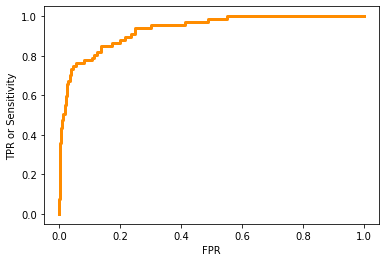

In [34]:
# roc curve
fpr, tpr, _ = roc_curve(y_val, probs)
plt.plot(fpr, tpr, color='darkorange', lw=3)
plt.xlabel('FPR')
plt.ylabel('TPR or Sensitivity')

In [35]:
# AUC: higher the better
roc_auc_score(y_val, probs)

0.9342835743682004

### Crossvalidation Classification

In [36]:
# standardizing the predictor
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [37]:
# Crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size = 0.2, n_splits = 10, random_state = 123)
scores = cross_val_score(model, X_std, y, cv = shuffle_split,
                         scoring='f1')
print(scores)
print('Mean f1 Score = ',scores.mean())

[0.46315789 0.35294118 0.36363636 0.46464646 0.47311828 0.34408602
 0.4952381  0.44897959 0.43298969 0.5       ]
Mean f1 Score =  0.4338793578362007
